# Final Project

# Introduction

This project aims to explore the factors that influence the amount of time players spend playing minecraft, with a specific focus on demographics such as gender, age, and experience levels. By using statistical methods learned in our DSCI 100 class, we seek to answer the following question: "What "kind" of player is most likely to contribute a large amount of data?"

This project is carried out using data acquired from the PLAI project, they have made a minecraft server called PLAIcraft where players can play and interact with each other. Their final goal is to gather real player data to make AI Minecraft players.

## To address this question, we utilized a dataset collected from a PLAICRAFT server:

### Players Dataset (players.csv):

The variables in the dataset are as follows:
- experience: The experience level of the player (e.g., Beginning, Intermediate, Pro) - factor type

- subscribe: Subscription status of the player - logical type

- hashedEmail: Hashed representation of the player's email - character type

- played_hours: Total hours logged by the player - double type

- name: Name of the player - character type

- gender: Gender of the player - factor type

- age: Age of the player - double type

- individualId: Empty column - logical type

- organizationName: Empty column - logical type

This dataset contains 197 observations, each representing a unique player. Notably, the columns individualId and organizationName are empty and not used in our analysis.

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(url, "players.csv")

players_data <- read_csv(url)
players_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


Methods & Results:
    We will use KNN regression to find how each variable affects the 'playtime' variable representing the amount of 'data' a player contributes.


To do this we first need to clean the data.
    The hashedEmail, individualId, and organizationName variables are not useful for analysis so we will remove them.
    

In [2]:
players_clean1 <- players_data |> 
  select(-hashedEmail, -individualId, -organizationName)
players_clean1

experience,subscribe,played_hours,name,gender,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


We can also combine some gender variables as 'non-binary' refers to genders that are not male/female

In [4]:
players_clean2 <- players_clean1 |>
  mutate(gender = case_when(gender == "Non-binary" | gender == "Two-Spirited"  | gender == "Agender" | gender == "Other" ~ "Non-binary", TRUE ~ gender))
players_clean2

experience,subscribe,played_hours,name,gender,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


Those that answered 'Prefer not to say' for gender do not help with predicting which type of players are likely to contribute more data so we will remove those from our anaylsis.

In [5]:
players_clean3 <- players_clean2 |>
  filter(gender != "Prefer not to say")
players_clean3

experience,subscribe,played_hours,name,gender,age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,17


### Visualization of Data

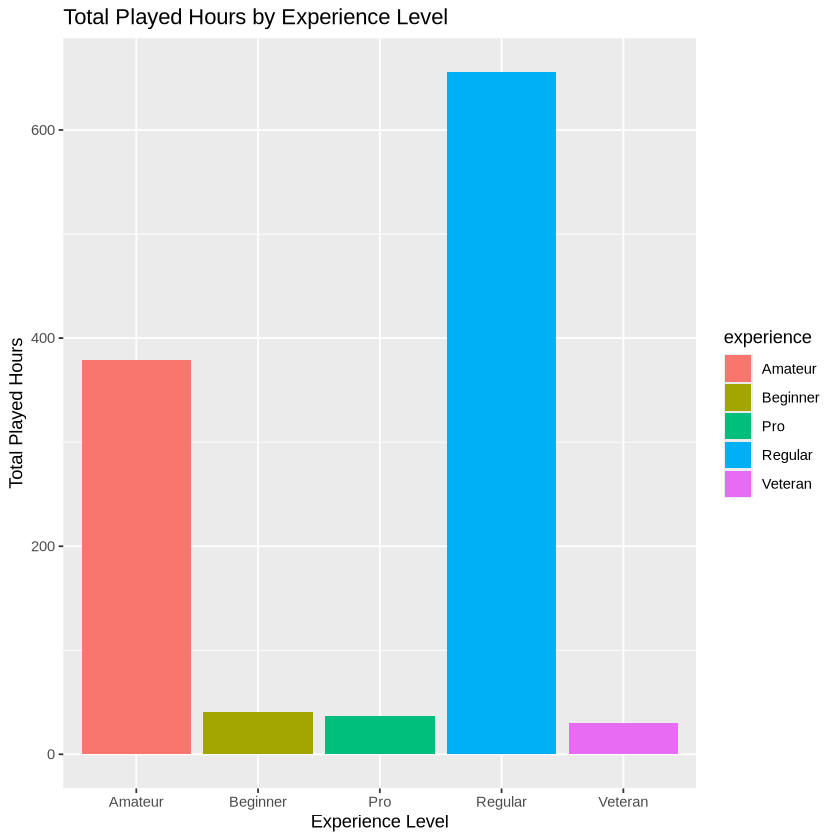

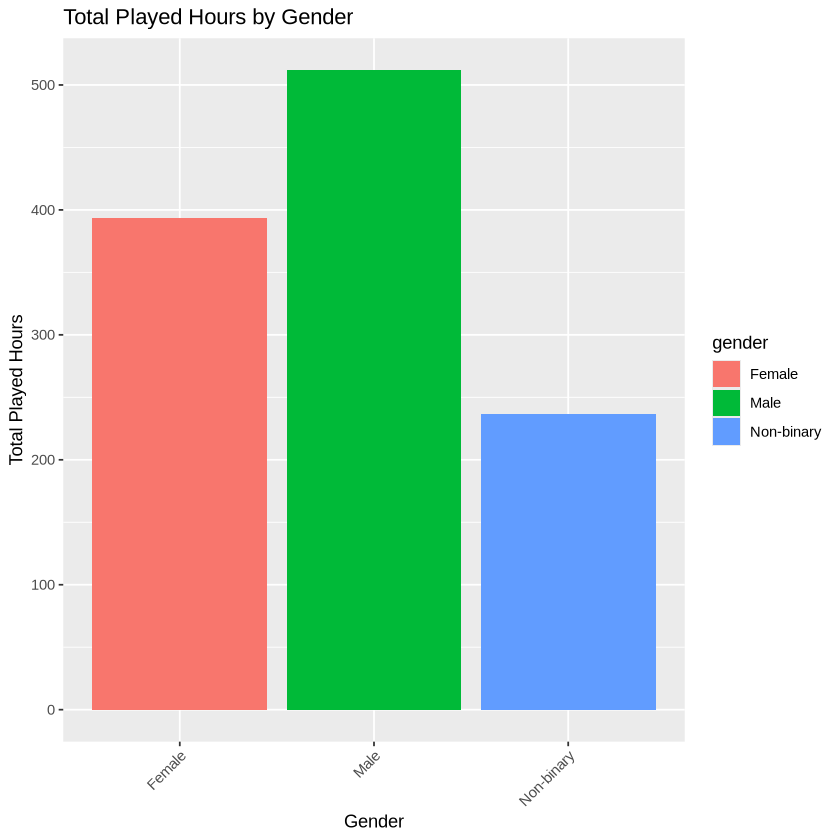

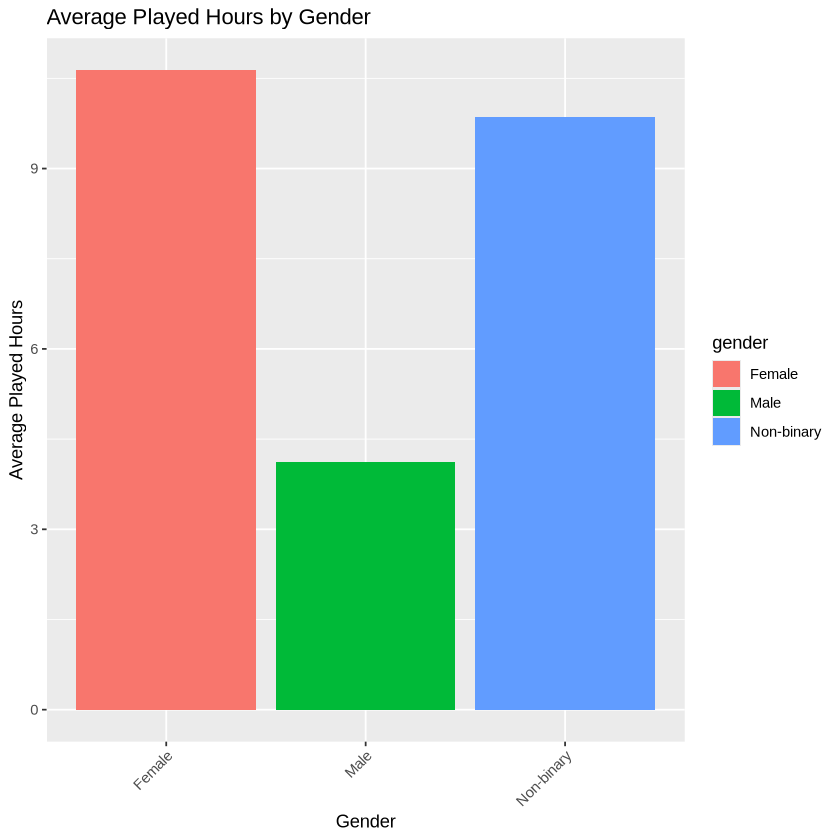

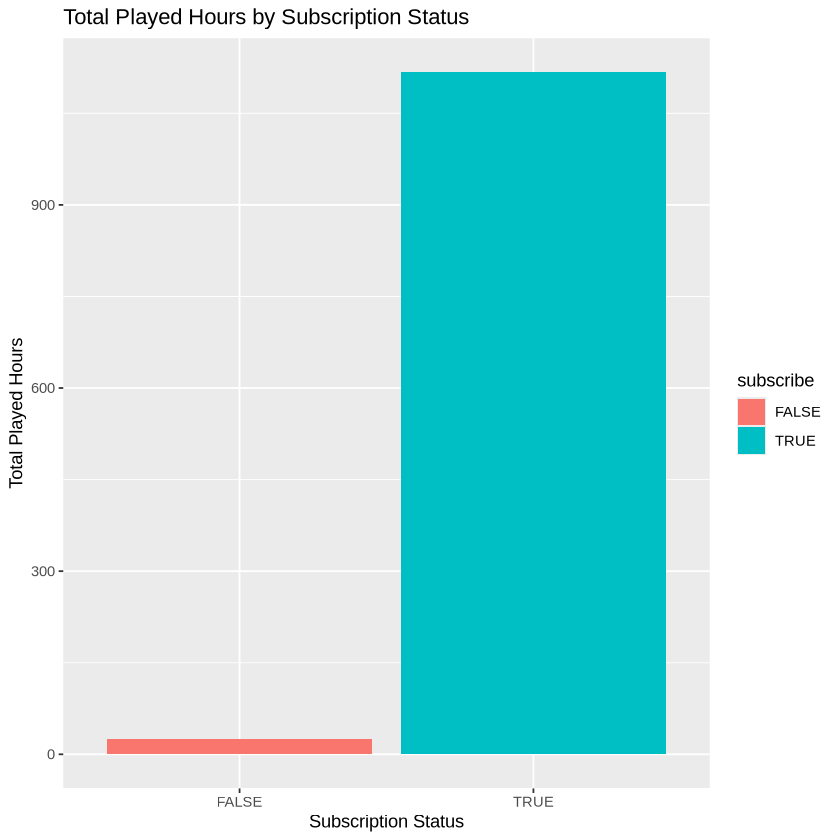

In [ ]:
# Plot 1, bar graph showing how played hours relates to experience

grouped_data_experience <- players_clean3 |>
  group_by(experience) |>
  summarise(total_played_hours = sum(played_hours, na.rm = TRUE))

ggplot(grouped_data_experience, aes(x = experience, y = total_played_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Played Hours by Experience Level", 
       x = "Experience Level", 
       y = "Total Played Hours")

# Plot 2, bar graph showing how played hours relates to gender

grouped_data_gender <- players_clean3 |>
  group_by(gender) |>
  summarise(total_played_hours = sum(played_hours, na.rm = TRUE))

ggplot(grouped_data_gender, aes(x = gender, y = total_played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Played Hours by Gender", 
       x = "Gender", 
       y = "Total Played Hours") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 3, bar graph showing average time played for each gender

grouped_data_avg <- players_clean3 |>
  group_by(gender) |>
  summarise(average_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(grouped_data_avg, aes(x = gender, y = average_played_hours, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours by Gender", 
       x = "Gender", 
       y = "Average Played Hours") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot 4, Bar graph of playtime by subscription status

ggplot(players_clean3, aes(x = subscribe, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity") +
    labs(title = "Total Played Hours by Subscription Status",
         x = "Subscription Status", y = "Total Played Hours")

# Plot 5, scatterplot visualizing playtime for ages

players_clean3 <- players_clean3 |> 
    mutate(played_hours_log = played_hours + 0.1) # Add a small constant to avoid log(0) - hard to see on graph

ggplot(players_clean3, aes(x = age, y = played_hours_log, color = gender)) + 
    geom_point() + 
    scale_y_log10() +
    facet_wrap(~ gender) + 
    labs(
        title = "Played Hours by Age, Separated by Gender",
        x = "Age",
        y = "Played Hours (Log Scale)",
        caption = "Note: A small constant (0.1) was added to played hours to handle zero values for log transformation.")

# Plot 6, bar graph showing average playtime for experience levels

grouped_experience <- players_clean3 |>
  group_by(experience) |>
  summarise(average_played_hours = mean(played_hours, na.rm = TRUE))

ggplot(grouped_experience, aes(x = experience, y = average_played_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours by Experience Level", 
       x = "Experience Level", 
       y = "Average Played Hours")

# Plot 7, histogram showing distribution of played hours
ggplot(players_clean3, aes(x = played_hours)) + 
  geom_histogram(binwidth = 25, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Played Hours", 
       x = "Played Hours", 
       y = "Count")
